In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # pretty matplotlib plots
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import datasets, linear_model, metrics

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Get slugging percentages from Batting data
slugpct = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv",sep=',')

In [4]:
slugpct.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [5]:
slugpct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110495 entries, 0 to 110494
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  110495 non-null  object 
 1   yearID    110495 non-null  int64  
 2   stint     110495 non-null  int64  
 3   teamID    110495 non-null  object 
 4   lgID      109758 non-null  object 
 5   G         110495 non-null  int64  
 6   AB        110495 non-null  int64  
 7   R         110495 non-null  int64  
 8   H         110495 non-null  int64  
 9   2B        110495 non-null  int64  
 10  3B        110495 non-null  int64  
 11  HR        110495 non-null  int64  
 12  RBI       109739 non-null  float64
 13  SB        108127 non-null  float64
 14  CS        86954 non-null   float64
 15  BB        110495 non-null  int64  
 16  SO        108395 non-null  float64
 17  IBB       73845 non-null   float64
 18  HBP       107679 non-null  float64
 19  SH        104427 non-null  float64
 20  SF  

In [6]:
slugpct.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,109739.000000,108127.000000,86954.000000,110495.000000,108395.000000,73845.000000,107679.000000,104427.000000,74392.00000,85054.000000
mean,1968.051948,1.079624,50.605258,138.557084,18.397312,36.184117,6.177429,1.233893,2.859939,16.720664,2.893190,1.162431,12.787556,20.625038,1.040368,1.060810,2.168529,1.01480,2.874586
std,39.992877,0.288199,46.831714,183.317500,27.990668,52.066687,9.613576,2.580559,6.386896,26.187532,7.564655,2.662906,20.555314,28.724308,2.688349,2.299942,4.129955,1.92328,4.658673
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1938.000000,1.000000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1977.000000,1.000000,34.000000,45.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2002.000000,1.000000,78.000000,222.000000,26.000000,55.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.00000,4.000000
max,2021.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.00000,36.000000


In [7]:
slugpct.shape

(110495, 22)

In [8]:
slugpct.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
110490,zimmejo02,2021,1,MIL,NL,2,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
110491,zimmeky01,2021,1,KCA,AL,52,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
110492,zimmery01,2021,1,WAS,NL,110,255,27,62,16,...,46.0,0.0,0.0,16,77.0,0.0,0.0,0.0,2.0,9.0
110493,zuberty01,2021,1,KCA,AL,31,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
110494,zuninmi01,2021,1,TBA,AL,109,333,64,72,11,...,62.0,0.0,0.0,34,132.0,0.0,7.0,0.0,1.0,7.0


In [9]:
slugpct.isna()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110490,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110491,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110492,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110493,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
slugpct = slugpct.fillna(0)

In [11]:
# Change types to all ints for regression modeling
slugpct["RBI"] = slugpct["RBI"].astype(int)
slugpct["SB"] = slugpct["SB"].astype(int)
slugpct["CS"] = slugpct["CS"].astype(int)

In [12]:
slugpct.corr()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
yearID,1.000000,0.008484,-0.004129,-0.111691,-0.117776,-0.109087,-0.033436,-0.271024,0.139208,-0.066333,-0.151329,0.060558,-0.046381,0.138111,0.154893,-0.016978,-0.223690,0.233472,0.202922
stint,0.008484,1.000000,-0.124525,-0.099032,-0.093063,-0.094596,-0.090734,-0.065868,-0.066901,-0.089031,-0.056676,-0.056846,-0.085250,-0.090093,-0.054059,-0.061881,-0.065961,-0.059765,-0.067632
G,-0.004129,-0.124525,1.000000,0.942596,0.886871,0.924404,0.875768,0.646179,0.672984,0.868204,0.547138,0.553139,0.842087,0.787410,0.480654,0.595973,0.463177,0.588913,0.684314
AB,-0.111691,-0.099032,0.942596,1.000000,0.953444,0.987703,0.932339,0.711248,0.702428,0.922266,0.601608,0.575850,0.872595,0.804607,0.479665,0.626991,0.477476,0.596552,0.697742
R,-0.117776,-0.093063,0.886871,0.953444,1.000000,0.967960,0.921795,0.740833,0.736156,0.925483,0.653566,0.561106,0.894141,0.752114,0.461942,0.633036,0.415730,0.552644,0.620616
H,-0.109087,-0.094596,0.924404,0.987703,0.967960,1.000000,0.947331,0.735261,0.708201,0.936426,0.611091,0.577220,0.868961,0.762984,0.479592,0.621424,0.463164,0.583239,0.679985
2B,-0.033436,-0.090734,0.875768,0.932339,0.921795,0.947331,1.000000,0.652081,0.730861,0.917643,0.524955,0.539904,0.837343,0.769629,0.491071,0.604670,0.381489,0.605320,0.685138
3B,-0.271024,-0.065868,0.646179,0.711248,0.740833,0.735261,0.652081,1.000000,0.344628,0.657161,0.610340,0.423974,0.593775,0.420319,0.166032,0.429008,0.470635,0.209881,0.262115
HR,0.139208,-0.066901,0.672984,0.702428,0.736156,0.708201,0.730861,0.344628,1.000000,0.839324,0.267738,0.376207,0.735221,0.796674,0.613057,0.508221,0.064490,0.651891,0.678223
RBI,-0.066333,-0.089031,0.868204,0.922266,0.925483,0.936426,0.917643,0.657161,0.839324,1.000000,0.505040,0.482203,0.859916,0.781229,0.529901,0.607950,0.349682,0.622892,0.682771


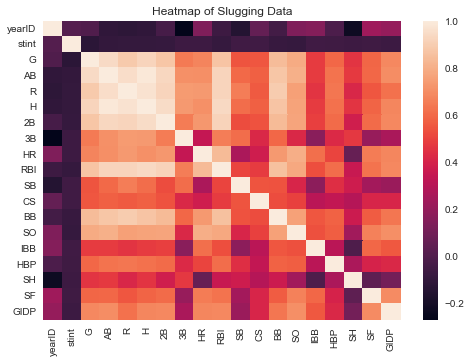

In [13]:
sns.heatmap(slugpct.corr())
plt.title("Heatmap of Slugging Data")
plt.show()

In [14]:
slugpct["HR"]

0          0
1          0
2          0
3          2
4          0
          ..
110490     0
110491     0
110492    14
110493     0
110494    33
Name: HR, Length: 110495, dtype: int64

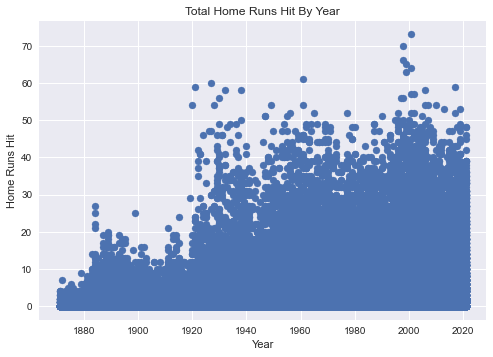

In [15]:
plt.scatter(slugpct["yearID"], slugpct["HR"])
plt.title("Total Home Runs Hit By Year")
plt.xlabel("Year")
plt.ylabel("Home Runs Hit")
plt.show()

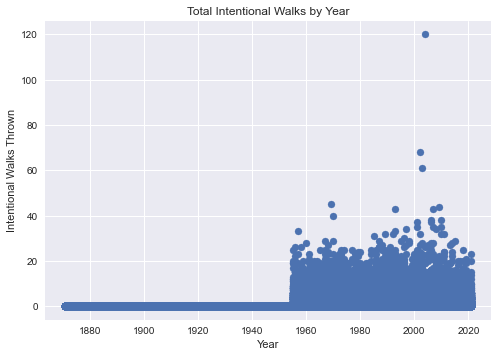

In [16]:
plt.scatter(slugpct["yearID"], slugpct["IBB"])
plt.title("Total Intentional Walks by Year")
plt.xlabel("Year")
plt.ylabel("Intentional Walks Thrown")
plt.show()

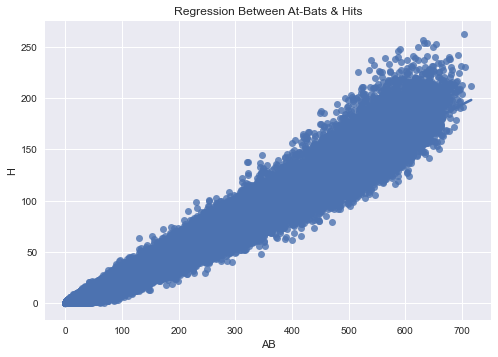

In [17]:
# Regression Plot
sns.regplot(slugpct["AB"], slugpct["H"])
plt.title("Regression Between At-Bats & Hits")
plt.show()

In [18]:
 slugpct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110495 entries, 0 to 110494
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  110495 non-null  object 
 1   yearID    110495 non-null  int64  
 2   stint     110495 non-null  int64  
 3   teamID    110495 non-null  object 
 4   lgID      110495 non-null  object 
 5   G         110495 non-null  int64  
 6   AB        110495 non-null  int64  
 7   R         110495 non-null  int64  
 8   H         110495 non-null  int64  
 9   2B        110495 non-null  int64  
 10  3B        110495 non-null  int64  
 11  HR        110495 non-null  int64  
 12  RBI       110495 non-null  int64  
 13  SB        110495 non-null  int64  
 14  CS        110495 non-null  int64  
 15  BB        110495 non-null  int64  
 16  SO        110495 non-null  float64
 17  IBB       110495 non-null  float64
 18  HBP       110495 non-null  float64
 19  SH        110495 non-null  float64
 20  SF  

In [19]:
# Change types to all ints for regression modeling, part 2
slugpct["SO"] = slugpct["SO"].astype(int)
slugpct["IBB"] = slugpct["IBB"].astype(int)
slugpct["HBP"] = slugpct["HBP"].astype(int)
slugpct["SH"] = slugpct["SH"].astype(int)
slugpct["SF"] = slugpct["SF"].astype(int)
slugpct["GIDP"] = slugpct["GIDP"].astype(int)

In [20]:
slugpct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110495 entries, 0 to 110494
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   playerID  110495 non-null  object
 1   yearID    110495 non-null  int64 
 2   stint     110495 non-null  int64 
 3   teamID    110495 non-null  object
 4   lgID      110495 non-null  object
 5   G         110495 non-null  int64 
 6   AB        110495 non-null  int64 
 7   R         110495 non-null  int64 
 8   H         110495 non-null  int64 
 9   2B        110495 non-null  int64 
 10  3B        110495 non-null  int64 
 11  HR        110495 non-null  int64 
 12  RBI       110495 non-null  int64 
 13  SB        110495 non-null  int64 
 14  CS        110495 non-null  int64 
 15  BB        110495 non-null  int64 
 16  SO        110495 non-null  int64 
 17  IBB       110495 non-null  int64 
 18  HBP       110495 non-null  int64 
 19  SH        110495 non-null  int64 
 20  SF        110495 non-null 

In [27]:
slugpct.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [29]:
# Find connections on multiple regression between at bats (y) and everything else (x)
x = slugpct.drop(["playerID","stint","teamID","lgID","AB"], axis=1)
y = slugpct["AB"]

In [30]:
x.columns

Index(['yearID', 'G', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [31]:
regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [32]:
pred_h = regr.predict(x)
pred_h

array([ 15.35554255, 113.3439254 , 141.60712609, ..., 266.13384233,
         3.1854613 , 317.59656543])

In [34]:
# Split train and test datasets in 80-20 form: 80 training, 20 testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (88396, 17)
X_test: (22099, 17)
Y_train: (88396,)
Y_test: (22099,)


In [37]:
lr_slug = LinearRegression()
lr_slug.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred = lr_slug.predict(x_test)
y_pred

array([169.551311  ,  39.09589109,   4.74391468, ..., 135.89102023,
         4.48151496, 141.90278321])

In [42]:
# Get accuracy of model
slg_acc = r2_score(y_test, y_pred) * 100
print("Accuracy of model is: ", slg_acc)

Accuracy of model is:  98.85670485819468


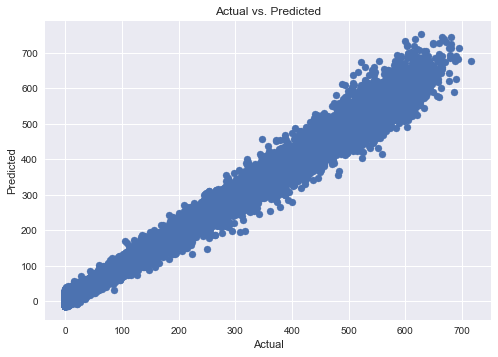

In [43]:
# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()

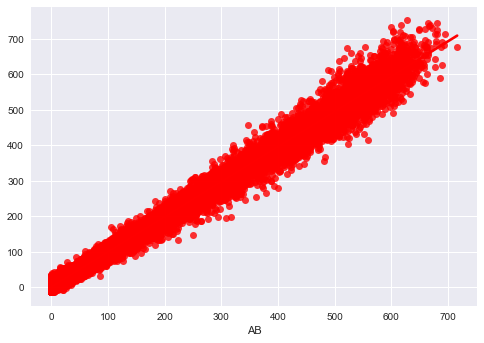

In [44]:
# Regression plot - Seaborn
sns.regplot(y_test, y_pred, None, color='red')
plt.show()